# 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по Ирисам Фишера - https://scikit-learn.org/stable/datasets/toy_dataset.html

Выборка содержит следующие колонки:
- sepal length in cm - длина чашелистника в см.
- sepal width in cm - ширина чашелистника в см.
- petal length in cm - длина лепестка в см.
- petal width in cm - ширина лепестка в см.
- class: 
  - Iris-Setosa - Ирис щетинистый.
  - Iris-Versicolour - Ирис разноцветный.
  - Iris-Virginica - Ирис-Виргиния.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from sklearn.datasets import *

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
# Датасет возвращается в виде словаря со следующими ключами
for x in iris:
    print(x)

data
target
frame
target_names
DESCR
feature_names
filename


In [5]:
# Размерность данных
iris['data'].shape

(150, 4)

In [6]:
# Размерность целевого признака
iris['target'].shape

(150,)

In [7]:
data_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 2) Основные характеристики датасета

In [8]:
# Первые 5 строк датасета
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# Размер датасета - 150 строк, 5 колонок
data_iris.shape

(150, 5)

In [10]:
total_count = data_iris.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [11]:
# Список колонок
data_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [12]:
# Список колонок с типами данных
data_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [13]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data_iris.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data_iris[data_iris[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [14]:
# Основные статистические характеристки набора данных
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
# Определим уникальные значения для целевого признака
data_iris['target'].unique()

array([0., 1., 2.])

Целевой признак состоит из трех значений: 0, 1 и 2

# 3) Визуальное исследование датасета
## Диаграмма рассеивания
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

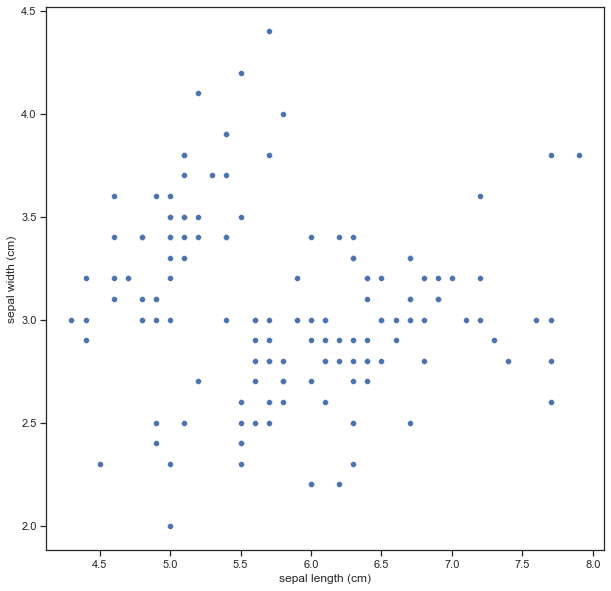

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='sepal width (cm)', data=data_iris)

Посмотрим насколько на эту зависимость влияет целевой признак.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

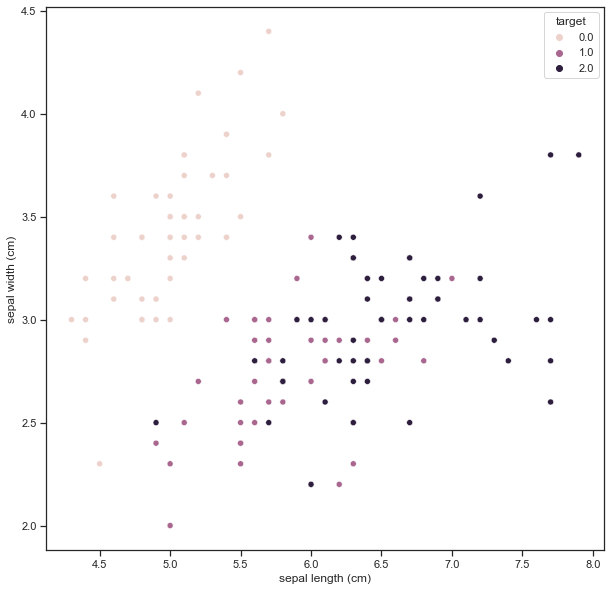

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='sepal width (cm)', data=data_iris, hue='target')

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

C:\Users\nstger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

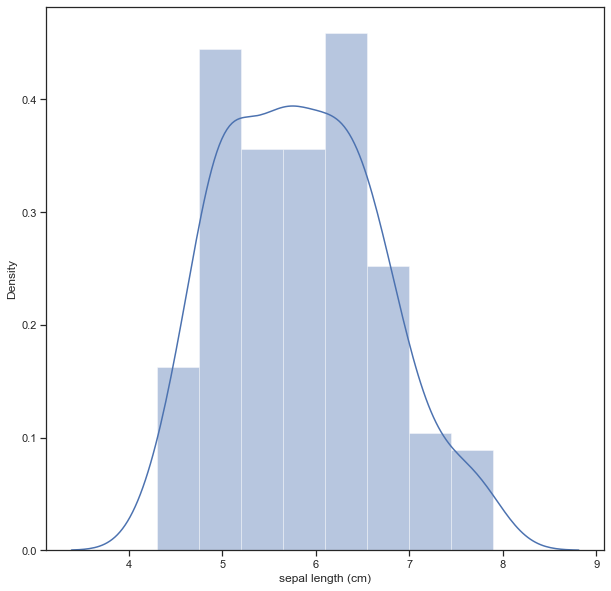

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_iris['sepal length (cm)'])

## "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

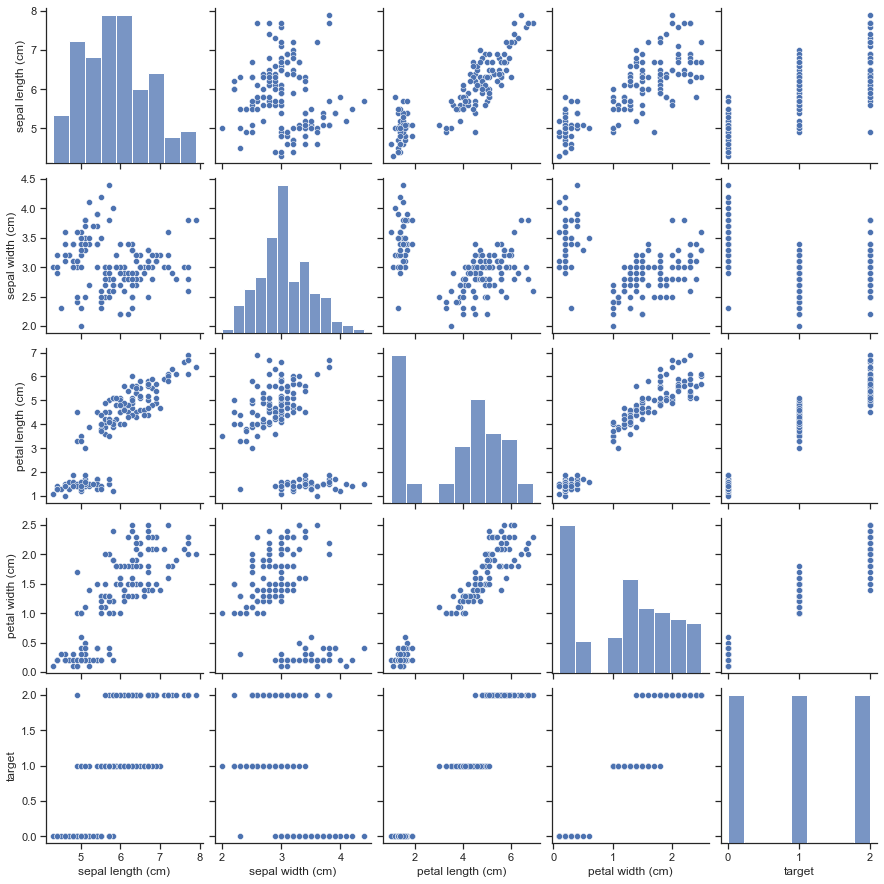

In [19]:
sns.pairplot(data_iris)

**С помощью параметра "hue" возможна группировка по значениям какого-либо признака. В данном случае по типу Ирисов.**

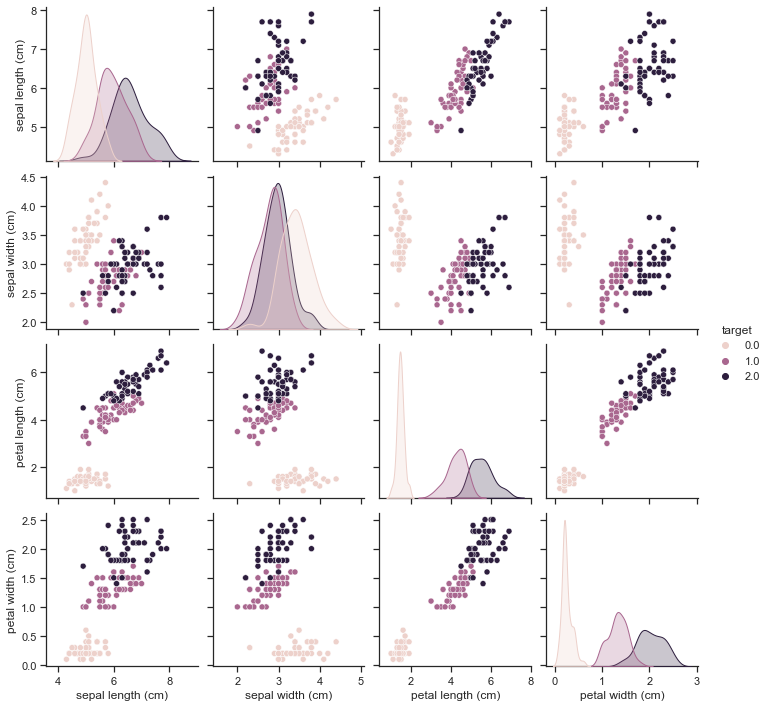

In [20]:
sns.pairplot(data_iris, hue="target")

## Ящик с усами

<AxesSubplot:xlabel='sepal length (cm)'>

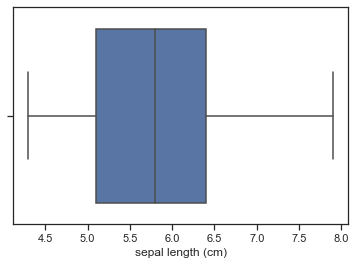

In [21]:
sns.boxplot(x=data_iris['sepal length (cm)'])

## Violin plot (Скрипичная диаграмма)
Отображает одномерное распределение вероятности и по краям отображаются распределения плотности.

C:\Users\nstger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

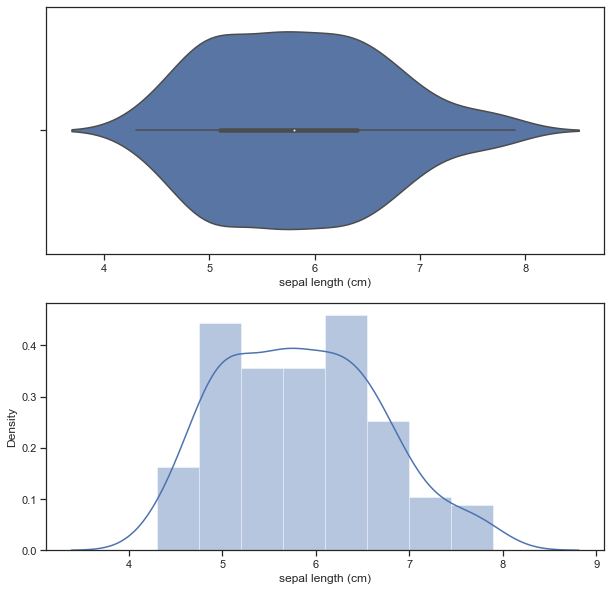

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data_iris['sepal length (cm)'])
sns.distplot(data_iris['sepal length (cm)'], ax=ax[1])

# 4) Информация о корреляции признаков


Проверка корреляции признаков позволяет решить две задачи:

 - Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
 - Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [23]:
data_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000



Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

 - Целевой признак наиболее сильно коррелирует с длиной (0.95) и шириной (0.96) лепестков. Эти признаки обязательно следует оставить в модели.
 - Целевой признак отчасти коррелирует с длиной чашелистника (0.78). Этот признак стоит также оставить в модели.
 - Целевой признак отрицательно коррелирует с шириной чашелистника (- 0.43). Значения данных параметров расходятся.

По умолчанию при построении матрицы используется коэффициент корреляции *Пирсона*. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции *Кендалла* и *Спирмена*. На практике три метода редко дают значимые различия.

In [24]:
data_iris.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [25]:
data_iris.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.076997,0.718516,0.655309,0.670444
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal length (cm),0.718516,-0.185994,1.000000,0.806891,0.822911
petal width (cm),0.655309,-0.157126,0.806891,1.000000,0.839687
target,0.670444,-0.337614,0.822911,0.839687,1.000000


In [26]:
data_iris.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
target,0.798078,-0.440290,0.935431,0.938179,1.000000



В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.


<AxesSubplot:>

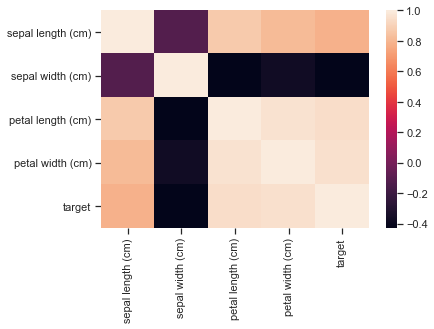

In [27]:
sns.heatmap(data_iris.corr())

<AxesSubplot:>

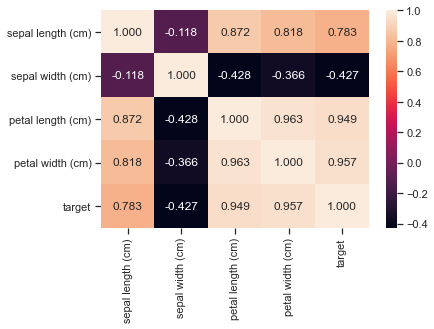

In [28]:
# Вывод значений в ячейках
sns.heatmap(data_iris.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

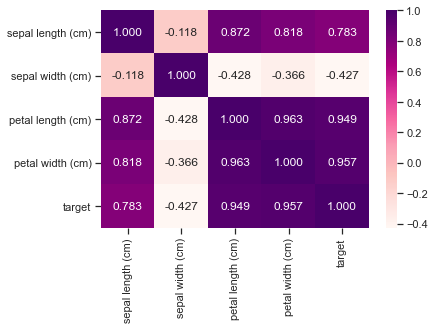

In [29]:
# Изменение цветовой гаммы
sns.heatmap(data_iris.corr(), cmap='RdPu', annot=True, fmt='.3f')

<AxesSubplot:>

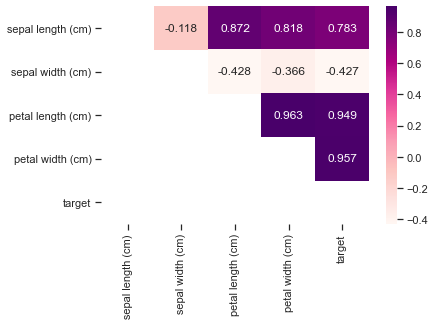

In [30]:
# Треугольный вариант матрицы
mask = np.zeros_like(data_iris.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data_iris.corr(), mask=mask, annot=True, cmap='RdPu', fmt='.3f')

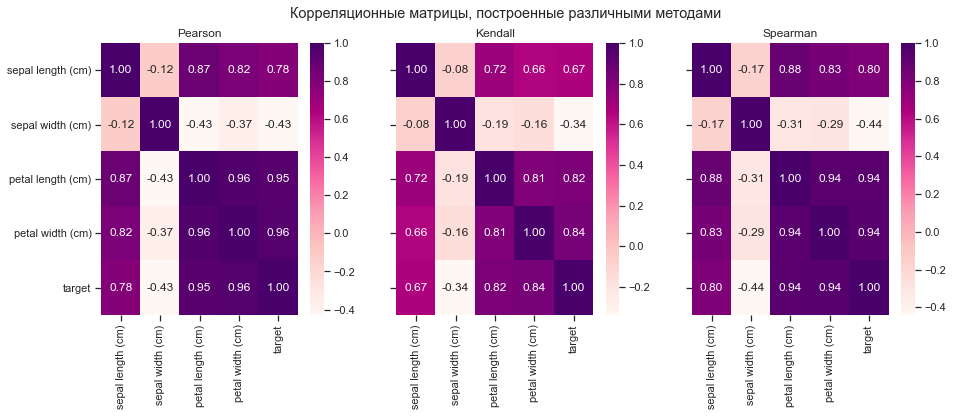

In [31]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data_iris.corr(method='pearson'), ax=ax[0], annot=True, cmap='RdPu', fmt='.2f')
sns.heatmap(data_iris.corr(method='kendall'), ax=ax[1], annot=True, cmap='RdPu', fmt='.2f')
sns.heatmap(data_iris.corr(method='spearman'), ax=ax[2], annot=True, cmap='RdPu', fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')